In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [213]:
from google.colab import files
uploaded=files.upload()

Saving wine.csv to wine (2).csv


In [214]:
data1=pd.read_csv("wine.csv")

In [215]:
data1.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [216]:
data1.shape

(178, 14)

In [217]:
data1.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [218]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [219]:
data1.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [220]:
data1.duplicated().sum()

0

In [221]:
data=data1.drop(columns='Type')

In [222]:
data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [223]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

In [224]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)
scaled_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [225]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)

In [226]:
#creating DataFrame for PCA components
pca_component=pd.DataFrame(pca.fit_transform(scaled_data), columns=['a','b','c'])
pca_component.head()

,a,b,c
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


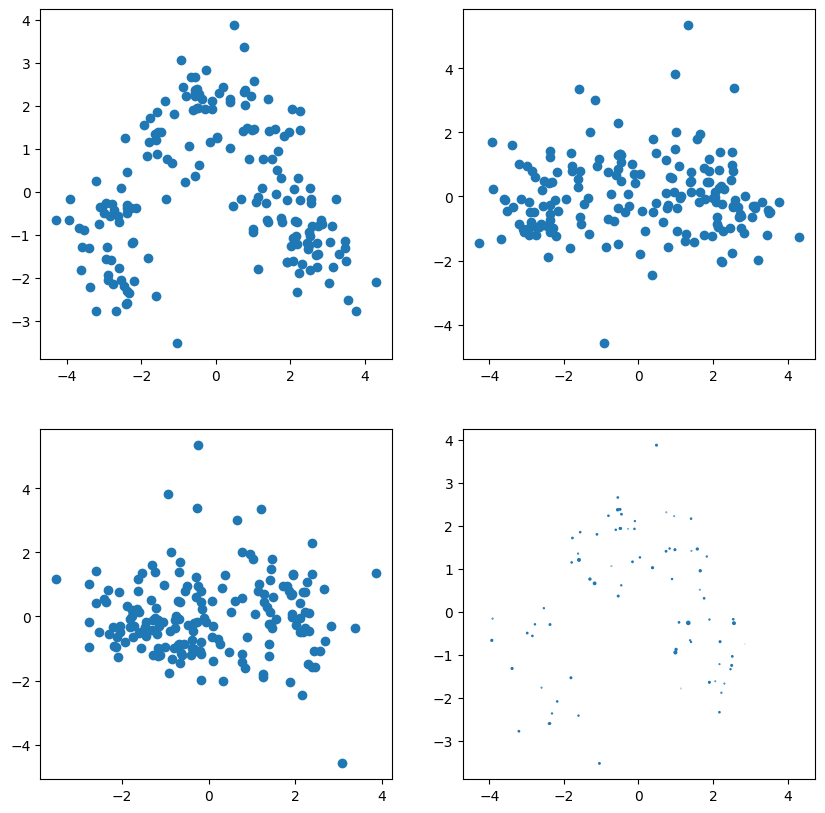

In [227]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(pca_component.a,pca_component.b)

plt.subplot(2,2,2)
plt.scatter(pca_component.a,pca_component.c)

plt.subplot(2,2,3)
plt.scatter(pca_component.b,pca_component.c)

plt.subplot(2,2,4)
plt.scatter(pca_component.a,pca_component.b, pca_component.c)

In [228]:
#Check the variance
var=pca.explained_variance_ratio_
var
#1st component is capturing 39% of the variance and 2nd component is capturing 17% of the variance and 3rd component is capturing 0.10% of the variance

array([0.36198848, 0.1920749 , 0.11123631])

In [229]:
# Cumulative variance
 #Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([36.2 , 55.41, 66.53])

Text(0.5, 1.0, 'Scree-Plot')

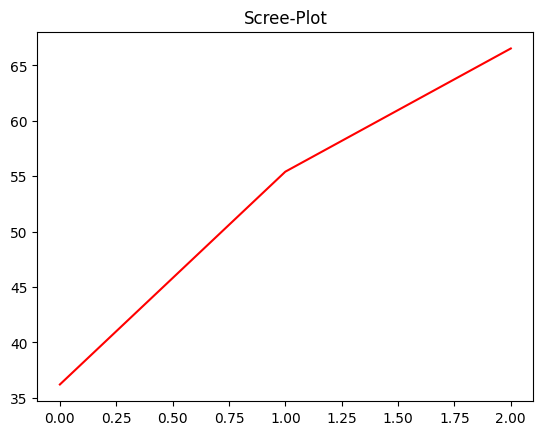

In [230]:
# Variance plot for PCA components obtained
plt.plot(var1,color="red")
plt.title("Scree-Plot")

In [231]:
#on x axis we have 3 Principle components
#Y axis is cumulative variance


In [232]:
pca_values=pca_component.values

In [233]:
pca_values[:,0:1]

array([[ 3.31675081],
       [ 2.20946492],
       [ 2.51674015],
       [ 3.75706561],
       [ 1.00890849],
       [ 3.05025392],
       [ 2.44908967],
       [ 2.05943687],
       [ 2.5108743 ],
       [ 2.75362819],
       [ 3.47973668],
       [ 1.7547529 ],
       [ 2.11346234],
       [ 3.45815682],
       [ 4.31278391],
       [ 2.3051882 ],
       [ 2.17195527],
       [ 1.89897118],
       [ 3.54198508],
       [ 2.0845222 ],
       [ 3.12440254],
       [ 1.08657007],
       [ 2.53522408],
       [ 1.64498834],
       [ 1.76157587],
       [ 0.9900791 ],
       [ 1.77527763],
       [ 1.23542396],
       [ 2.18840633],
       [ 2.25610898],
       [ 2.50022003],
       [ 2.67741105],
       [ 1.62857912],
       [ 1.90269086],
       [ 1.41038853],
       [ 1.90382623],
       [ 1.38486223],
       [ 1.12220741],
       [ 1.5021945 ],
       [ 2.52980109],
       [ 2.58809543],
       [ 0.66848199],
       [ 3.07080699],
       [ 0.46220914],
       [ 2.10135193],
       [ 1

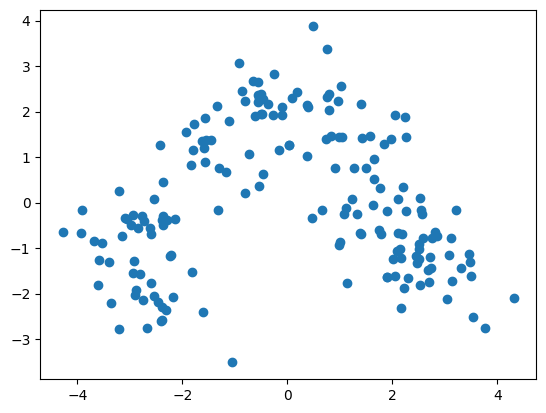

In [234]:
# plot between PCA1 and PCA2
x = pca_values[:,0:1]
y = pca_values[:,1:2]
z = pca_values[:2:3]
plt.scatter(x,y)

In [235]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2', 'pc3']), finalDf[['Type']]], axis = 1)

We got the 3 principle components we will perform KMeans and Hierarchel clustering on this now

In [236]:
finalDf.head()

,pc1,pc2,pc3,Type
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1


In [237]:
finalDf.shape

(178, 4)

KMeans

In [238]:
from sklearn.cluster import KMeans

In [239]:
#Hyperparameter Tuning
WCSS=[]
for i in range(1,11):
  model=KMeans(n_clusters=i, random_state=42)
  model.fit(finalDf)
  WCSS.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [240]:
len(WCSS)

10

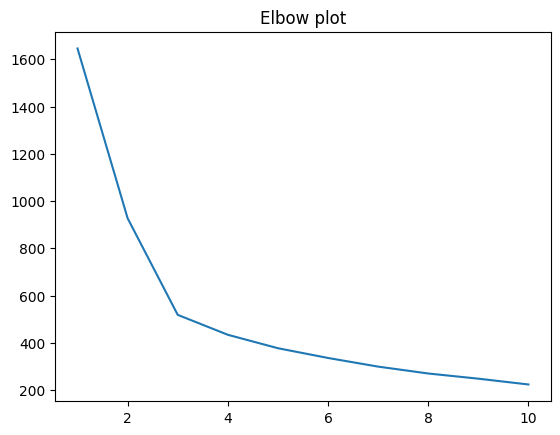

In [241]:
#ELBOW PLOT

plt.plot(range(1,11), WCSS)
plt.title("Elbow plot")
plt.show()

#from the below plot we can consider k value as 3

In [242]:
#let us consider k=3

In [243]:
#Build Model
final_model=KMeans(n_clusters=3, random_state=42)
final_model.fit(finalDf)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [244]:
finalDf['ClusterId']=final_model.predict(finalDf)

In [245]:
finalDf.head()

,pc1,pc2,pc3,Type,ClusterId
0,3.316751,-1.443463,-0.165739,1,1
1,2.209465,0.333393,-2.026457,1,1
2,2.516740,-1.031151,0.982819,1,1
3,3.757066,-2.756372,-0.176192,1,1
4,1.008908,-0.869831,2.026688,1,1


In [246]:
#we will group our data based on clusters
grp=finalDf.groupby(finalDf['ClusterId'])

for x,y in grp:
  print(y)
  print('--------------------------------------------------------------------------------')

          pc1       pc2       pc3  Type  ClusterId
59  -0.928582  3.073486 -4.585064     2          0
60  -1.542480  1.381444 -0.874683     2          0
61  -1.836250  0.829984 -1.605702     2          0
62   0.030607  1.262786 -1.784408     2          0
63   2.050262  1.925033 -0.007369     2          0
..        ...       ...       ...   ...        ...
125 -0.096810  2.109998  0.434826     2          0
126  0.038487  1.266762  0.687578     2          0
127 -1.597159  1.208144  3.361176     2          0
128 -0.479565  1.938841  1.296508     2          0
129 -1.792833  1.150288  0.782800     2          0

[66 rows x 5 columns]
--------------------------------------------------------------------------------
          pc1       pc2       pc3  Type  ClusterId
0    3.316751 -1.443463 -0.165739     1          1
1    2.209465  0.333393 -2.026457     1          1
2    2.516740 -1.031151  0.982819     1          1
3    3.757066 -2.756372 -0.176192     1          1
4    1.008908 -0.869831  2.02

In [247]:
finalDf['ClusterId'].value_counts()

0    66
1    62
2    50
Name: ClusterId, dtype: int64

In [248]:
grp.agg(['mean'])

,pc1,pc2,pc3,Type
,mean,mean,mean,mean
ClusterId,,,,
0,-0.064219,1.757963,0.158990,2.000000
1,2.276194,-0.932054,0.001528,1.048387
2,-2.737711,-1.164764,-0.211761,2.960000


In [249]:
#3 clusters has been formed
#Pc1, pc2 and pc3 are the principle components.
#We get this pca on the basis of the variance


silhouette_score for K means

In [250]:
from sklearn.metrics import silhouette_score
silhouette_score(finalDf, finalDf['ClusterId'] )

0.50400881536661

Hierarchial clustering

In [251]:
from sklearn.cluster import AgglomerativeClustering

In [275]:
model2=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  #affinity is the way in which you want to find the distance)
#as we already checked the k value using elbow plot, we will take 3
model2.fit(finalDf)
model2.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 0, 0,
       2, 2, 1, 2, 1, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [277]:
finalDf['Hier_ClusterId']=model2.fit_predict(finalDf)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [278]:
finalDf.head()

,pc1,pc2,pc3,Type,ClusterId,Hier_ClusterId
0,3.316751,-1.443463,-0.165739,1,1,0
1,2.209465,0.333393,-2.026457,1,1,0
2,2.516740,-1.031151,0.982819,1,1,0
3,3.757066,-2.756372,-0.176192,1,1,0
4,1.008908,-0.869831,2.026688,1,1,0


In [279]:
#we will group our data based on clusters
grp1=finalDf.groupby(finalDf['Hier_ClusterId'])
for x,y in grp1:
  print(y)
  print("-------------------------------------------------------------------------------------------------")


          pc1       pc2       pc3  Type  ClusterId  Hier_ClusterId
0    3.316751 -1.443463 -0.165739     1          1               0
1    2.209465  0.333393 -2.026457     1          1               0
2    2.516740 -1.031151  0.982819     1          1               0
3    3.757066 -2.756372 -0.176192     1          1               0
4    1.008908 -0.869831  2.026688     1          1               0
..        ...       ...       ...   ...        ...             ...
125 -0.096810  2.109998  0.434826     2          0               0
126  0.038487  1.266762  0.687578     2          0               0
127 -1.597159  1.208144  3.361176     2          0               0
128 -0.479565  1.938841  1.296508     2          0               0
129 -1.792833  1.150288  0.782800     2          0               0

[105 rows x 6 columns]
-------------------------------------------------------------------------------------------------
          pc1       pc2       pc3  Type  ClusterId  Hier_ClusterId
60  -1.

In [256]:
grp1[['pc1',	'pc2',	'pc3'	,'Type']].agg(['mean'])

,pc1,pc2,pc3,Type
,mean,mean,mean,mean
Hier_ClusterId,,,,
0,1.313975,0.120590,0.357938,1.438095
1,-2.641654,-1.017061,-0.266749,2.888889
2,0.246418,2.224177,-1.219950,2.000000


In [257]:
from sklearn.metrics import silhouette_score
silhouette_score(finalDf, finalDf['Hier_ClusterId'] )

0.3687366487504737

In [258]:
#when compared to Kmeans and Hieracrchial clustering KMeans has good silhouette_score

Clustering without PCA on original data

KMEANS

In [259]:
data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [260]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

In [261]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)
scaled_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [262]:
#Hyperparameter Tuning
WCSS=[]
for i in range(1,11):
  model=KMeans(n_clusters=i, random_state=42)
  model.fit(scaled_data)
  WCSS.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

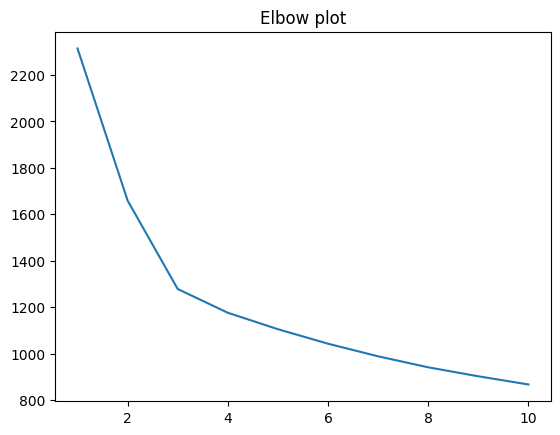

In [263]:
#ELBOW PLOT

plt.plot(range(1,11), WCSS)
plt.title("Elbow plot")
plt.show()

In [264]:
#here we can take k=4

In [265]:
#Build Model
final_model1=KMeans(n_clusters=4, random_state=42)
final_model1.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [266]:
data['Cluster_id']=final_model1.predict(scaled_data)

In [267]:
data.head(2)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster_id
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,3


In [270]:
#we will group our data based on clusters
grp3=data.groupby(data['Cluster_id'])

for x,y in grp3:
  print(y)
  print('--------------------------------------------------------------------------------')

     Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
59     12.37   0.94  1.36        10.6         88     1.98        0.57   
60     12.33   1.10  2.28        16.0        101     2.05        1.09   
61     12.64   1.36  2.02        16.8        100     2.02        1.41   
62     13.67   1.25  1.92        18.0         94     2.10        1.79   
64     12.17   1.45  2.53        19.0        104     1.89        1.75   
67     12.37   1.17  1.92        19.6         78     2.11        2.00   
68     13.34   0.94  2.36        17.0        110     2.53        1.30   
70     12.29   1.61  2.21        20.4        103     1.10        1.02   
72     13.49   1.66  2.24        24.0         87     1.88        1.84   
75     11.66   1.88  1.92        16.0         97     1.61        1.57   
76     13.03   0.90  1.71        16.0         86     1.95        2.03   
77     11.84   2.89  2.23        18.0        112     1.72        1.32   
80     12.00   0.92  2.00        19.0         86   

In [271]:
grp3.agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Cluster_id,,,,,,,,,,,,,
0,12.255455,1.732500,2.187955,20.054545,89.613636,2.006818,1.771818,0.406364,1.333409,2.908409,1.074455,2.656818,495.772727
1,12.434194,2.301935,2.400968,20.454839,104.129032,2.691613,2.619677,0.291613,2.080645,3.440645,1.032903,3.074839,594.064516
2,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020
3,13.795926,1.933333,2.430370,16.724074,106.129630,2.862222,3.017407,0.285185,1.907778,5.664630,1.065185,3.145185,1147.537037


In [280]:
###we have 4 clusters
#In cluster 3 the alcohol,Magnesium, phenols, percent, Flavanoids and Proline is high compared to others clusters
#In cluster 2 Alcalinity and Color are high and very less Flavanoids


In [281]:
silhouette_score(scaled_data, data['Cluster_id'] )

0.25173343011696475

Hierarchial Clustering

In [273]:
from sklearn.cluster import AgglomerativeClustering

In [282]:
model3=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')  #affinity is the way in which you want to find the distance)
#as we already checked the k value using elbow plot, we will take 4
model3.fit(scaled_data)
model3.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 3, 3, 3, 0, 3, 1,
       1, 0, 3, 1, 3, 0, 0, 0, 0, 3, 3, 3, 1, 0, 0, 0, 0, 2, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [283]:
data['HierClusterid']=model3.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [284]:
data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster_id,HierClusterid
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,3,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,0


In [287]:
grp4=data.groupby(data['HierClusterid'])
for x,y in grp4:
  print(y)
  print("-------------------------------------------------------------------------------------------------")

     Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
4      13.24   2.59  2.87        21.0        118     2.80        2.69   
15     13.63   1.81  2.70        17.2        112     2.85        2.91   
16     14.30   1.92  2.72        20.0        120     2.80        3.14   
17     13.83   1.57  2.62        20.0        115     2.95        3.40   
25     13.05   2.05  3.22        25.0        124     2.63        2.68   
28     13.87   1.90  2.80        19.4        107     2.95        2.97   
33     13.76   1.53  2.70        19.5        132     2.95        2.74   
53     13.77   1.90  2.68        17.1        115     3.00        2.79   
63     12.37   1.13  2.16        19.0         87     3.50        3.10   
67     12.37   1.17  1.92        19.6         78     2.11        2.00   
71     13.86   1.51  2.67        25.0         86     2.95        2.86   
72     13.49   1.66  2.24        24.0         87     1.88        1.84   
73     12.99   1.67  2.60        30.0        139   

In [291]:
grp4[['Alcohol'	,'Malic',	'Ash'	,'Alcalinity'	,'Magnesium'	,'Phenols'	,'Flavanoids'	,'Nonflavanoids',	'Proanthocyanins'	,'Color'	,'Hue',	'Dilution'	,'Proline']].agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
HierClusterid,,,,,,,,,,,,,
0,12.415172,1.989828,2.381379,21.117241,93.844828,2.424828,2.339828,0.366897,1.678103,3.280345,1.057931,2.978448,573.379310
1,13.604211,1.982807,2.360526,16.652632,106.368421,2.797719,2.920175,0.274386,2.015088,5.326667,1.051579,3.141228,1073.052632
2,13.117843,3.322157,2.431765,21.333333,99.333333,1.675686,0.810588,0.444314,1.164314,7.170980,0.691373,1.709804,622.490196
3,12.465000,1.500833,2.045833,17.341667,98.500000,1.913333,1.475833,0.402500,0.967500,3.395000,1.155500,2.156667,565.000000


In [292]:
#4 clusters are formed
#Alcohol and Flavanoids, proline content is more in cluster 1
#color is more used in cluster 2 and Hue is very less


In [293]:
#dendrogram

from scipy.cluster import hierarchy

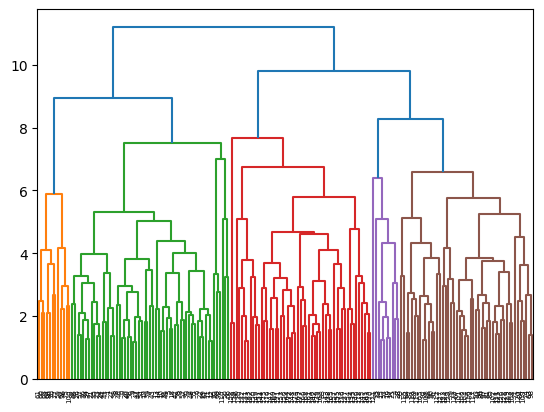

In [294]:
hr=hierarchy.linkage(scaled_data, method='complete')
dn=hierarchy.dendrogram(hr)

In [295]:
from sklearn.metrics import silhouette_score
silhouette_score(scaled_data, data['HierClusterid'] )

0.19382526203175696

In [ ]:
#for principal component scores we have obtained 3 clusters
#for our original data we have obtined 4 clusters.
#the silhouette_score is good for Kmeans clustering model for PCA